In [182]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime, time
import warnings
warnings.filterwarnings('ignore')

In [55]:
Airlines_Passengers=pd.read_csv("D:/Assignments Excel R/assignment 18/Airlines+Data.csv")
Airlines_Passengers.index.freq = 'MS'
Airlines_Passengers.head()


,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


 ## Exploratory Data Analyst

In [56]:
AP_df=Airlines_Passengers.copy()
AP_df.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


In [57]:
# Data Structure
AP_df.shape

(96, 2)

In [58]:
#data type
AP_df.dtypes

Month         object
Passengers     int64
dtype: object

In [59]:
#Duplicates
AP_df[AP_df.duplicated()].shape

(0, 2)

In [60]:
# Missing Vlaues 
AP_df.isna().sum()

Month         0
Passengers    0
dtype: int64

In [61]:
#Descriptive statistics
AP_df.describe()


,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [62]:
AP_df2= AP_df.copy()

 ## Visualization

<AxesSubplot:xlabel='month', ylabel='year'>

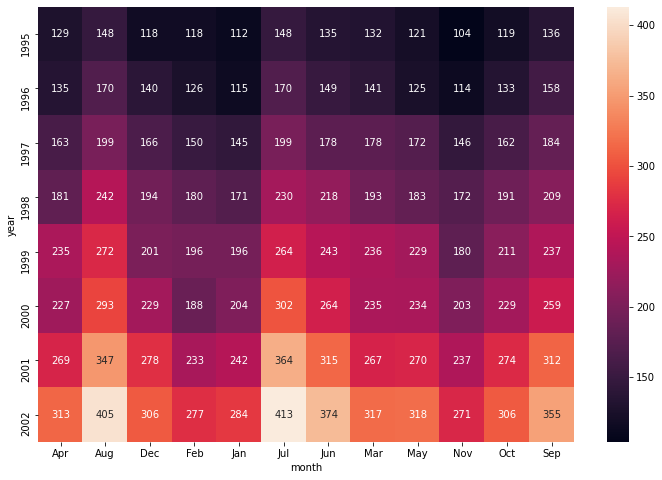

In [73]:
#HeatMap
plt.figure(figsize=(12,8))
heatmap_y_month=pd.pivot_table(data=AP_df2,values="Passengers", index='year', columns="month", aggfunc="mean", fill_value=0)
sns.heatmap(heatmap_y_month, annot=True, fmt="g") #fmt is format of the grid values


<AxesSubplot:xlabel='year', ylabel='Passengers'>

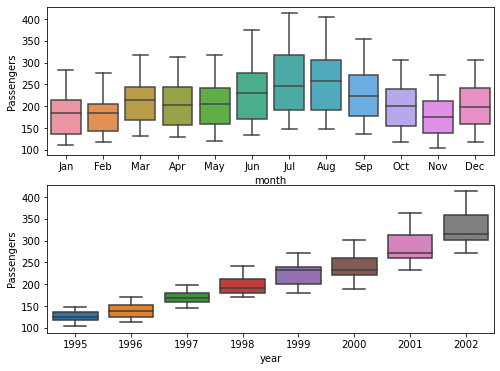

In [74]:
# Box Plot
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month", y="Passengers", data=AP_df2)
plt.subplot(212)
sns.boxplot(x="year", y="Passengers", data=AP_df2)


<AxesSubplot:xlabel='year', ylabel='Passengers'>

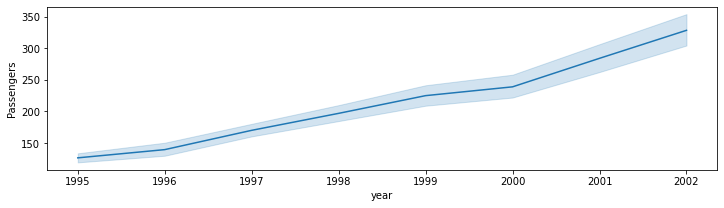

In [75]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year", y="Passengers", data=AP_df2)

## Outlier detection
### Box plot and interquartile range

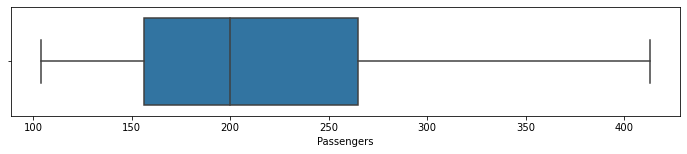

In [76]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(AP_df2['Passengers'], whis=1.5)

whis=1.5 1st quartile = 160

3rd quartile = 260

Quartile range = (3rd quartile - 1st quartile) = 260-160 = 100

Whisker on the upper side

3rd quartile + (Quartile range whis) = 260 + (100 *1.5) = 260 + 150 = 410

There is no outliers above the whisker 450.

Whisker on th lower side

1st quartile - (Quartile range whis) = 160 - (100*1.5) = 160-150=10

There is no outliers on the negative side of the lower whisker.

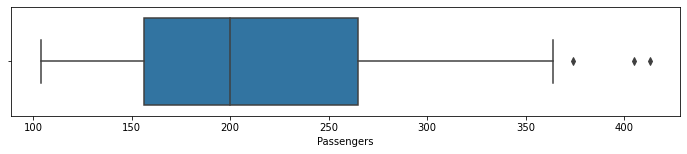

In [83]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(AP_df2['Passengers'], whis=1)

whis=1 1st quartile = 160

3rd quartile = 260

Quartile range = (3rd quartile - 1st quartile) = 260-160 = 100

Whisker on the upper side

3rd quartile + (Quartile range whis) = 260 + (100 *1) = 260 + 100 = 360

There are 3 outliers above the whisker 350.

#### Conclusion for selecting whis = 1.5
So from the above analysis of whis 1 and 1.5, we should select the whis=1.5 quartile range. Because we don't want to miss any of the data in this time series analysis..

 ## Run an ETS Decomposition

In [112]:
from statsmodels.tsa.seasonal import seasonal_decompose

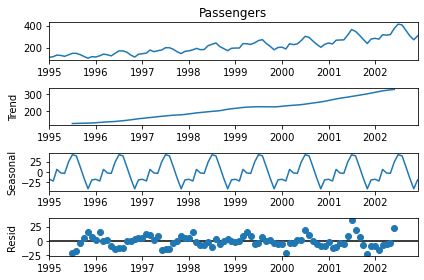

In [115]:
result= seasonal_decompose(df['Passengers'], model='additive')
result.plot();

 ## Transformation

In [116]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [118]:
series=pd.read_csv("D:/Assignments Excel R/assignment 18/Airlines+Data.csv", header=0, index_col=0, parse_dates=True)
series.head()

,Passengers
Month,
Jan-95,112
Feb-95,118
Mar-95,132
Apr-95,129
May-95,121


<AxesSubplot:xlabel='Month'>

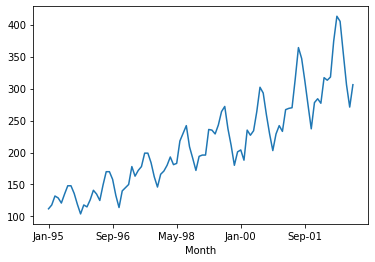

In [119]:
series.Passengers.plot()

In [120]:
dataframe=pd.DataFrame(series.values)
dataframe.columns=['Passengers']
dataframe['Passengers'] =np.sqrt(dataframe['Passengers'])

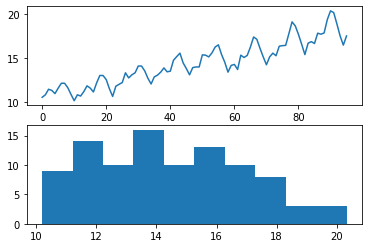

In [121]:
# Line Plot
pyplot.subplot(211)
pyplot.plot(dataframe['Passengers'])

# Histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Passengers'])
pyplot.show()

 ## Log Transform
    

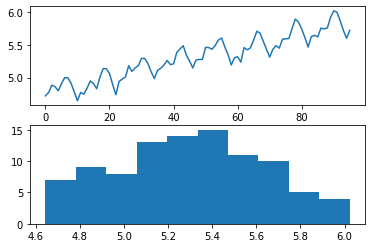

In [123]:
    from numpy import log

dataframe=pd.DataFrame(series.values)
dataframe.columns =['Passengers']
dataframe['Passengers']=log(dataframe['Passengers'])

# Line Plot
pyplot.subplot(211)
pyplot.plot(dataframe['Passengers'])

#Histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Passengers'])
pyplot.show()

 ## Creating Dummy Variables

In [124]:
import numpy as np
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']


n=AP_df['Month'][0]
n[0:3]

AP_df['month']=0

for i in range(96):
    n=AP_df['Month'][i]
    AP_df['month'][i]=n[0:3]

dummy=pd.DataFrame(pd.get_dummies(AP_df['month']))

AP=pd.concat((AP_df, dummy), axis=1)

AP.head()


,Month,Passengers,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan-95,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-95,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-95,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-95,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,May-95,121,May,0,0,0,0,0,0,0,0,1,0,0,0


In [125]:
AP1= AP[['Month','Passengers','month','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [126]:
AP1.head()

,Month,Passengers,month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-95,112,Jan,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-95,118,Feb,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-95,132,Mar,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-95,129,Apr,0,0,0,1,0,0,0,0,0,0,0,0
4,May-95,121,May,0,0,0,0,1,0,0,0,0,0,0,0


 ## Creating t, t_square and log values

In [127]:
t=np.arange(1,97)
AP1['t']=t

AP1['t_square']=AP1['t']*AP1['t']

log_Passengers=np.log(AP1['Passengers'])
AP1['log_Passengers']=log_Passengers

AP_df2= AP1[['Month','Passengers','t','t_square','log_Passengers','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','month']]

AP_df2


,Month,Passengers,t,t_square,log_Passengers,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,month
0,Jan-95,112,1,1,4.718499,1,0,0,0,0,0,0,0,0,0,0,0,Jan
1,Feb-95,118,2,4,4.770685,0,1,0,0,0,0,0,0,0,0,0,0,Feb
2,Mar-95,132,3,9,4.882802,0,0,1,0,0,0,0,0,0,0,0,0,Mar
3,Apr-95,129,4,16,4.859812,0,0,0,1,0,0,0,0,0,0,0,0,Apr
4,May-95,121,5,25,4.795791,0,0,0,0,1,0,0,0,0,0,0,0,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,92,8464,6.003887,0,0,0,0,0,0,0,1,0,0,0,0,Aug
92,Sep-02,355,93,8649,5.872118,0,0,0,0,0,0,0,0,1,0,0,0,Sep
93,Oct-02,306,94,8836,5.723585,0,0,0,0,0,0,0,0,0,1,0,0,Oct
94,Nov-02,271,95,9025,5.602119,0,0,0,0,0,0,0,0,0,0,1,0,Nov


In [128]:

AP_df2["Date"]= pd.to_datetime(AP_df2.Month,format="%b-%y")

AP_df2["year"] = AP_df2.Date.dt.strftime("%Y") #Year extraction 
AP_df2
    

,Month,Passengers,t,t_square,log_Passengers,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,month,Date,year
0,Jan-95,112,1,1,4.718499,1,0,0,0,0,0,0,0,0,0,0,0,Jan,1995-01-01,1995
1,Feb-95,118,2,4,4.770685,0,1,0,0,0,0,0,0,0,0,0,0,Feb,1995-02-01,1995
2,Mar-95,132,3,9,4.882802,0,0,1,0,0,0,0,0,0,0,0,0,Mar,1995-03-01,1995
3,Apr-95,129,4,16,4.859812,0,0,0,1,0,0,0,0,0,0,0,0,Apr,1995-04-01,1995
4,May-95,121,5,25,4.795791,0,0,0,0,1,0,0,0,0,0,0,0,May,1995-05-01,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,92,8464,6.003887,0,0,0,0,0,0,0,1,0,0,0,0,Aug,2002-08-01,2002
92,Sep-02,355,93,8649,5.872118,0,0,0,0,0,0,0,0,1,0,0,0,Sep,2002-09-01,2002
93,Oct-02,306,94,8836,5.723585,0,0,0,0,0,0,0,0,0,1,0,0,Oct,2002-10-01,2002
94,Nov-02,271,95,9025,5.602119,0,0,0,0,0,0,0,0,0,0,1,0,Nov,2002-11-01,2002


 ## Time series decomposition

 ## Splitting Data

In [129]:
Train=AP_df2.head(84)
Test=AP_df2.tail(12)

 ## Linear Model

In [130]:
import statsmodels.formula.api as smf

In [131]:
linear_model=smf.ols('Passengers~t', data=Train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

53.19923653480265

 ## Exponential

In [132]:
Exp=smf.ols('log_Passengers~t', data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.05736110315619

 ## Quadratic

In [133]:
Quad=smf.ols('Passengers~t+t_square', data=Train).fit()
pred_Quad=pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

48.05188897933154

 ## Additive Seasonality

In [134]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea=pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.81978481421814

 ## Additive Seasonality Quadratic

In [135]:
add_sea_Quad=smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_add_sea_Quad=pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_Quad =np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_Quad))**2))
rmse_add_sea_Quad

26.360817612081956

 ## Multiplicative Seasonality

In [136]:
Mul_sea= smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_Mult_sea=pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea= np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2)) 
rmse_Mult_sea

140.0632020470866

 ## Multiplicative Additive Seasonality

In [137]:
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

10.519172544324356

 ## Compare the Results

In [138]:
data={"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_Quad","rmse_Mult_sea","rmse_Mult_add_sea"]), "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_Quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,10.519173
4,rmse_add_sea_Quad,26.360818
1,rmse_Exp,46.057361
2,rmse_Quad,48.051889
0,rmse_linear,53.199237
3,rmse_add_sea,132.819785
5,rmse_Mult_sea,140.063202


 ### Observation - I have created 12 dummy variables, as per above RMSE values, I have selected Multiplicative Additive Seasonality  model for my forecasting algorithm.

 ## Predict for new time period

In [139]:
predict_data =AP_df2.copy() #pd.read_csv('D:/Data Secience/Assignment/Forecasting/Pridect_New Data.csv')
predict_data.head()

,Month,Passengers,t,t_square,log_Passengers,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,month,Date,year
0,Jan-95,112,1,1,4.718499,1,0,0,0,0,0,0,0,0,0,0,0,Jan,1995-01-01,1995
1,Feb-95,118,2,4,4.770685,0,1,0,0,0,0,0,0,0,0,0,0,Feb,1995-02-01,1995
2,Mar-95,132,3,9,4.882802,0,0,1,0,0,0,0,0,0,0,0,0,Mar,1995-03-01,1995
3,Apr-95,129,4,16,4.859812,0,0,0,1,0,0,0,0,0,0,0,0,Apr,1995-04-01,1995
4,May-95,121,5,25,4.795791,0,0,0,0,1,0,0,0,0,0,0,0,May,1995-05-01,1995


In [140]:
predict_data=predict_data.drop('month',axis=1)
predict_data=predict_data.drop('Date',axis=1)
predict_data=predict_data.drop('year',axis=1)

In [141]:
#Build the model on entire dataset
model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=AP_df2).fit()


In [142]:
pred_new=pd.Series(Mul_Add_sea.predict(predict_data))
predict_data['Forecated_Passengers']=pd.Series(pred_new)
predict_data

,Month,Passengers,t,t_square,log_Passengers,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Forecated_Passengers
0,Jan-95,112,1,1,4.718499,1,0,0,0,0,0,0,0,0,0,0,0,4.692645
1,Feb-95,118,2,4,4.770685,0,1,0,0,0,0,0,0,0,0,0,0,4.708238
2,Mar-95,132,3,9,4.882802,0,0,1,0,0,0,0,0,0,0,0,0,4.852602
3,Apr-95,129,4,16,4.859812,0,0,0,1,0,0,0,0,0,0,0,0,4.816871
4,May-95,121,5,25,4.795791,0,0,0,0,1,0,0,0,0,0,0,0,4.807152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,92,8464,6.003887,0,0,0,0,0,0,0,1,0,0,0,0,5.972648
92,Sep-02,355,93,8649,5.872118,0,0,0,0,0,0,0,0,1,0,0,0,5.865485
93,Oct-02,306,94,8836,5.723585,0,0,0,0,0,0,0,0,0,1,0,0,5.738005
94,Nov-02,271,95,9025,5.602119,0,0,0,0,0,0,0,0,0,0,1,0,5.606271


 ## Naive Method (Forecasting last month data)

In [143]:
naive=df.copy()
naive.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [144]:
train_len=84
train_naive=naive.head(84)
test_naive=naive.tail(12) 

In [145]:
naive_train=np.asarray(train_naive.Passengers)
lastvalue=naive_train[len(naive_train)-1]
y_hat=test_naive.copy()
y_hat['naive_forecast']=lastvalue

In [146]:
y_hat.head()

,Passengers,naive_forecast
Month,,
2002-01-01,284,278
2002-02-01,277,278
2002-03-01,317,278
2002-04-01,313,278
2002-05-01,318,278


 ## Plot train and forecast data

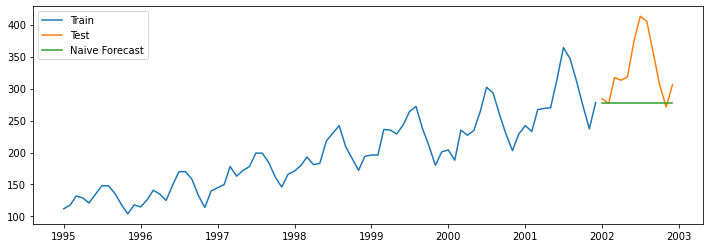

In [147]:
plt.figure(figsize=(12,4))
plt.plot(train_naive['Passengers'], label='Train')
plt.plot(test_naive['Passengers'], label='Test')
plt.plot(y_hat['naive_forecast'], label='Naive Forecast')
plt.legend(loc='best')
plt.show()

 ## Evaluate the Model

In [148]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from math import sqrt


In [149]:
mse_naive=mean_squared_error(test_naive.Passengers,y_hat['naive_forecast'])
mse_naive.round(2)

4624.92

In [150]:
rmse_Naive=rmse(test_naive.Passengers, y_hat['naive_forecast'])
rmse_Naive.round(2)


68.01

In [151]:
Naive={"MODEL":pd.Series(["Naive Mehtod"]), "RMSE":pd.Series([rmse_Naive]),"MSE":pd.Series([mse_naive])}
Naive=pd.DataFrame(Naive)
Naive

,MODEL,RMSE,MSE
0,Naive Mehtod,68.00674,4624.916667


## Observation
 #### 1) All the values are same as we assigned all the forecasting records to the last value of the train set.
 #### 2) The forecasting is undervalued when compared to the actual test data value

 ## Moving Average

In [152]:
AP_MA=naive.copy()
AP_MA.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


 ## Simple Moving Average

In [153]:
AP_MA['6-month-SMA']=AP_MA['Passengers'].rolling(window=6).mean()
AP_MA['12-month-SMA']=AP_MA['Passengers'].rolling(window=12).mean()

In [154]:
AP_MA.head(15)

,Passengers,6-month-SMA,12-month-SMA
Month,,,
1995-01-01,112,NaN,NaN
1995-02-01,118,NaN,NaN
1995-03-01,132,NaN,NaN
1995-04-01,129,NaN,NaN
1995-05-01,121,NaN,NaN
1995-06-01,135,124.500000,NaN
1995-07-01,148,130.500000,NaN
1995-08-01,148,135.500000,NaN
1995-09-01,136,136.166667,NaN


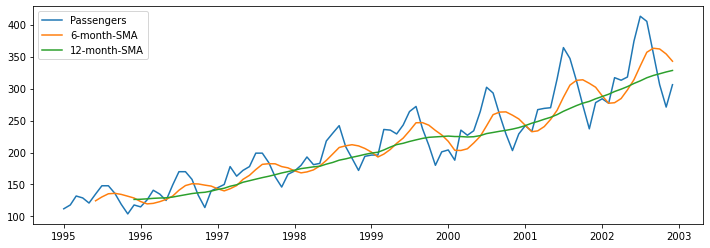

In [155]:
#AP_MA.plot();
plt.figure(figsize=(12,4))
plt.plot(AP_MA['Passengers'], label='Passengers')
plt.plot(AP_MA['6-month-SMA'], label='6-month-SMA')
plt.plot(AP_MA['12-month-SMA'], label='12-month-SMA')
plt.legend(loc='best')
plt.show()


 ## Evaluate the Model

In [156]:
y_hat_ma=AP_MA.copy()

In [157]:
train_ap_ma=AP_MA['Passengers'].head(84)
test_ap_ma=AP_MA['Passengers'].tail(12)

In [158]:
# Moving average window. We will take the avg of last 12 months for forecasting the future
ma_window=12

In [159]:
# Rolling function calculated the last number of records
y_hat_ma['ma_forecast'] = AP_MA['Passengers'].rolling(ma_window).mean()

In [160]:
train_ma1=train_ap_ma[len(train_ap_ma)-1]

In [161]:
y_hat_ma['ma_forecast']=train_ma1

In [162]:
y_hat_ma.head()

,Passengers,6-month-SMA,12-month-SMA,ma_forecast
Month,,,,
1995-01-01,112,NaN,NaN,278
1995-02-01,118,NaN,NaN,278
1995-03-01,132,NaN,NaN,278
1995-04-01,129,NaN,NaN,278
1995-05-01,121,NaN,NaN,278


In [163]:
rmse_ap_ma = np.sqrt(mean_squared_error(test_ap_ma, y_hat_ma['ma_forecast'][train_len:])).round(2)
rmse_ap_ma

68.01

In [164]:
mse_ap_ma=mean_squared_error(test_ap_ma, y_hat_ma['ma_forecast'][train_len:]).round(2)
mse_ap_ma.round(2)

4624.92

In [165]:
Moving_Average={"MODEL":pd.Series(["Simple Moving Average Mehtod"]),"RMSE":pd.Series([rmse_ap_ma]),"MSE":pd.Series([mse_ap_ma])}
Moving_Average=pd.DataFrame(Moving_Average)
Moving_Average

,MODEL,RMSE,MSE
0,Simple Moving Average Mehtod,68.01,4624.92


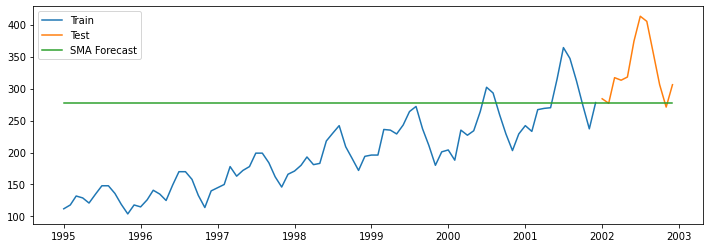

In [166]:
plt.figure(figsize=(12,4))
plt.plot(train_ap_ma, label='Train')
plt.plot(test_ap_ma, label='Test')
plt.plot(y_hat_ma['ma_forecast'], label='SMA Forecast')
plt.legend(loc='best')
plt.show()

 ## Exponentially Weighted Moving Average

In [167]:
EWMA=df.copy()

In [168]:
EWMA['EWMA12']=AP_MA['Passengers'].ewm(span=12, adjust=False).mean()

In [169]:
EWMA['EWMA12']

Month
1995-01-01    112.000000
1995-02-01    112.923077
1995-03-01    115.857988
1995-04-01    117.879836
1995-05-01    118.359861
                 ...    
2002-08-01    335.501047
2002-09-01    338.500886
2002-10-01    333.500749
2002-11-01    323.885249
2002-12-01    321.133673
Name: EWMA12, Length: 96, dtype: float64

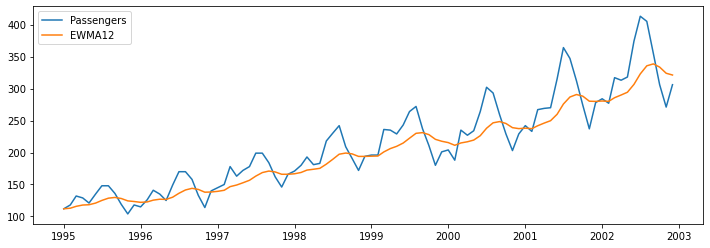

In [170]:
plt.figure(figsize=(12,4))
plt.plot(EWMA['Passengers'], label='Passengers')
plt.plot(EWMA['EWMA12'], label='EWMA12')
plt.legend(loc='best')
plt.show()

 ## Evaluate the Model

In [171]:
y_hat_ewma=EWMA.copy()

In [172]:
train_ewma=df['Passengers'].head(84)
test_ewma=df['Passengers'].tail(12)

In [173]:
ewma=train_ewma[len(train_ewma)-1]

In [174]:
y_hat_ewma['EWMA_Forecast']=ewma

In [175]:
mse_ewma=mean_squared_error(test_ewma, y_hat_ewma['EWMA_Forecast'][train_len:]).round(2)
mse_ewma

4624.92

In [176]:
rmse_ewma = np.sqrt(mean_squared_error(test_ewma, y_hat_ewma['EWMA_Forecast'][train_len:])).round(2)
rmse_ewma

68.01

In [177]:
EWMA={"MODEL":pd.Series(["Exponentially Weighted Moving Average"]),"RMSE":pd.Series([rmse_ewma]),"MSE":pd.Series([mse_ewma])}
EWMA=pd.DataFrame(EWMA)
EWMA

,MODEL,RMSE,MSE
0,Exponentially Weighted Moving Average,68.01,4624.92


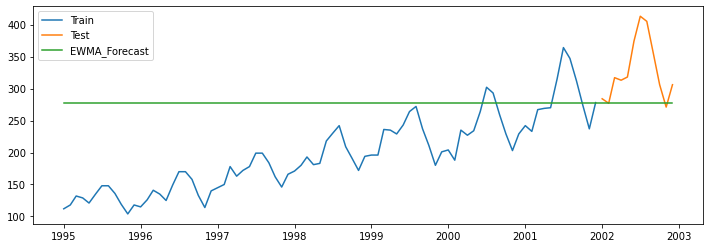

In [178]:
plt.figure(figsize=(12,4))
plt.plot(train_ewma, label='Train')
plt.plot(test_ewma, label='Test')
plt.plot(y_hat_ewma['EWMA_Forecast'], label='EWMA_Forecast')
plt.legend(loc='best')
plt.show()

 ## Comparing SMA to EWMA

 ## Exponential Smoothing Techniques
 
   ##### 1) Single Exponentail Smoothing (SES-Level)
   ##### 2) Double Exponetail Smoothing (Holt's Method-Level+Trend)
   ##### 3) Holt Winter Method (Level+Trend+Seasonality)

In [179]:
AP_EST=df.copy()
AP_EST.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


 ## Single Exponeatail Smoothing

In [180]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span=12
alpha=2/(span+1)
#AP_EST['SES']=AP_EST['Passengers'].ewm(alpha=alpha,adjust=False).mean()

In [192]:
model_ses12=SimpleExpSmoothing(AP_EST['Passengers'])
fitted_model=model_ses12.fit(smoothing_level=alpha, optimized=False)
AP_EST['SES12']=fitted_model.fittedvalues.shift(-1)
AP_EST.head()

,Passengers,SES12
Month,,
1995-01-01,112,112.000000
1995-02-01,118,112.923077
1995-03-01,132,115.857988
1995-04-01,129,117.879836
1995-05-01,121,118.359861


 ## Evaluate the Model

In [316]:
# Splitting data
train_ses=AP_EST.head(84)
test_ses=AP_EST.tail(12)

In [317]:
ses_model = SimpleExpSmoothing(train_ses["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test_ses.index[0],end= test_ses.index[-1])

In [318]:
mse_ses=mean_squared_error(test_ses.Passengers, pred_ses)
mse_ses.round(2)

4204.84

In [323]:
rmse_ses = np.sqrt(mean_squared_error(test_ses.Passengers, pred_ses)).round(2)
rmse_ses

64.84

In [324]:
SES={"MODEL":pd.Series(["Single Exponeatail Smoothing"]),"RMSE":pd.Series([rmse_ses]),"MSE":pd.Series([mse_ses])}
SES=pd.DataFrame(SES)
SES.round(2)

,MODEL,RMSE,MSE
0,Single Exponeatail Smoothing,64.84,4204.84


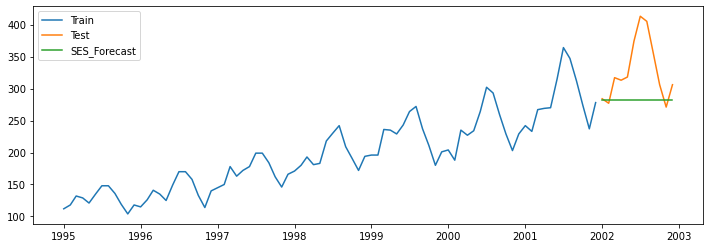

In [325]:
plt.figure(figsize=(12,4))
plt.plot(train_ses['Passengers'], label='Train')
plt.plot(test_ses['Passengers'], label='Test')
plt.plot(pred_ses, label='SES_Forecast')
plt.legend(loc='best')
plt.show()


 ## Double Exponential Smoothing (Holt method )

In [326]:
AP_DES=df.copy()
AP_DES.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [327]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_des=ExponentialSmoothing(AP_DES['Passengers'], trend='add')
fitted_model=model_des.fit()
AP_EST['DESadd12']=fitted_model.fittedvalues.shift(-1)
AP_EST.head()

,Passengers,SES12,DESadd12
Month,,,
1995-01-01,112,112.000000,114.067943
1995-02-01,118,112.923077,120.067943
1995-03-01,132,115.857988,134.067943
1995-04-01,129,117.879836,131.067943
1995-05-01,121,118.359861,123.067943


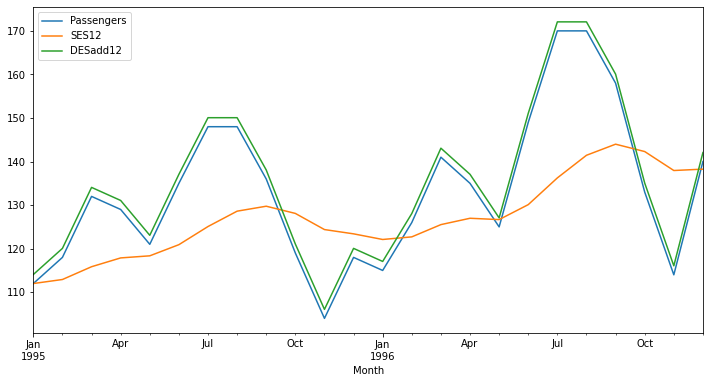

In [328]:
AP_EST[['Passengers','SES12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x', tight=True);

 ### Observation- DESadd12 Green line is following orginal line

In [329]:
model_add12=ExponentialSmoothing(AP_EST['Passengers'], trend='mul')
fitted_model=model_add12.fit()
AP_EST['DESmul12']=fitted_model.fittedvalues.shift(-1)
AP_EST.head().dropna()

,Passengers,SES12,DESadd12,DESmul12
Month,,,,
1995-01-01,112,112.000000,114.067943,110.729245
1995-02-01,118,112.923077,120.067943,116.957149
1995-03-01,132,115.857988,134.067943,131.505658
1995-04-01,129,117.879836,131.067943,128.487906
1995-05-01,121,118.359861,123.067943,120.248597


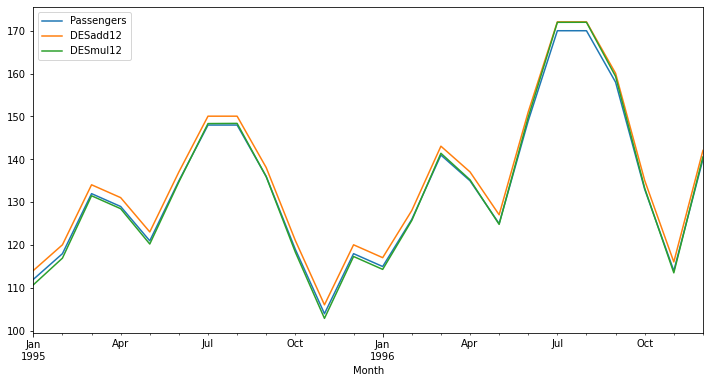

In [330]:
AP_EST[['Passengers','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x', tight=True)

 ### Observation- DESadd12 and DESmu12 lines are following orginal line

 ## Evaluate the Model

In [331]:
#Splitting the data
train_des=AP_DES.head(84)
test_des=AP_DES.tail(12)

In [332]:
model_des = ExponentialSmoothing(train_des["Passengers"]).fit()
pred_des = model_des.predict(start = test_des.index[0],end = test_des.index[-1])

In [333]:
model_des = ExponentialSmoothing(train_des["Passengers"]).fit()
pred_des1 = model_des.predict(start = test_des.index[0],end = test_des.index[-1])

In [334]:
mse_des=mean_squared_error(test_des.Passengers, pred_des)
mse_des.round(2)

4624.92

In [335]:
rmse_des = np.sqrt(mean_squared_error(test_des.Passengers, pred_des)).round(2)
rmse_des

68.01

In [336]:
DES={"MODEL":pd.Series(["Double Exponential Smoothing"]),"RMSE":pd.Series([rmse_des]),"MSE":pd.Series([mse_des])}
DES=pd.DataFrame(DES)
DES.round(2)

,MODEL,RMSE,MSE
0,Double Exponential Smoothing,68.01,4624.92


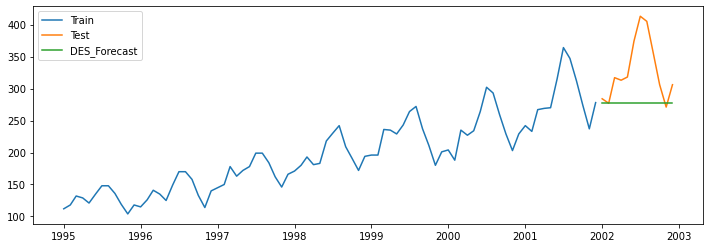

In [337]:
plt.figure(figsize=(12,4))
plt.plot(train_des['Passengers'], label='Train')
plt.plot(test_des['Passengers'], label='Test')
plt.plot(pred_des1, label='DES_Forecast')
plt.legend(loc='best')
plt.show()

 ## Triple Exponential Smoothing(Holt Winters Method)

In [338]:
AP_EST['TESadd12']=ExponentialSmoothing(AP_EST['Passengers'], trend='add', seasonal='add', seasonal_periods=12).fit().fittedvalues
AP_EST.head()

,Passengers,SES12,DESadd12,DESmul12,TESadd12
Month,,,,,
1995-01-01,112,112.000000,114.067943,110.729245,111.999578
1995-02-01,118,112.923077,120.067943,116.957149,119.929969
1995-03-01,132,115.857988,134.067943,131.505658,134.246126
1995-04-01,129,117.879836,131.067943,128.487906,130.736492
1995-05-01,121,118.359861,123.067943,120.248597,123.861466


In [339]:
AP_EST['TESmul12']=ExponentialSmoothing(AP_EST['Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues
AP_EST.head()

,Passengers,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,
1995-01-01,112,112.000000,114.067943,110.729245,111.999578,113.644395
1995-02-01,118,112.923077,120.067943,116.957149,119.929969,111.326935
1995-03-01,132,115.857988,134.067943,131.505658,134.246126,134.355763
1995-04-01,129,117.879836,131.067943,128.487906,130.736492,129.668595
1995-05-01,121,118.359861,123.067943,120.248597,123.861466,129.739619


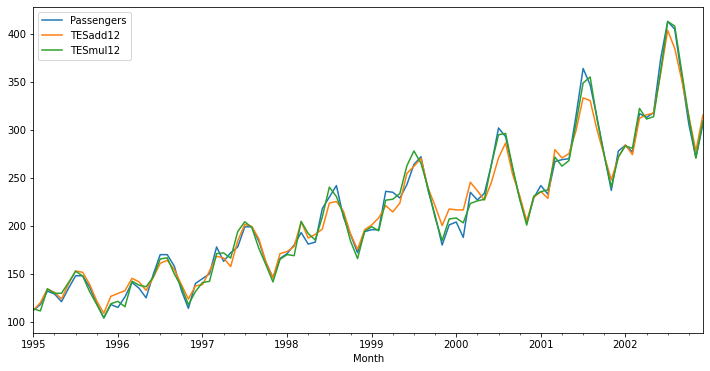

In [341]:
AP_EST[['Passengers','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

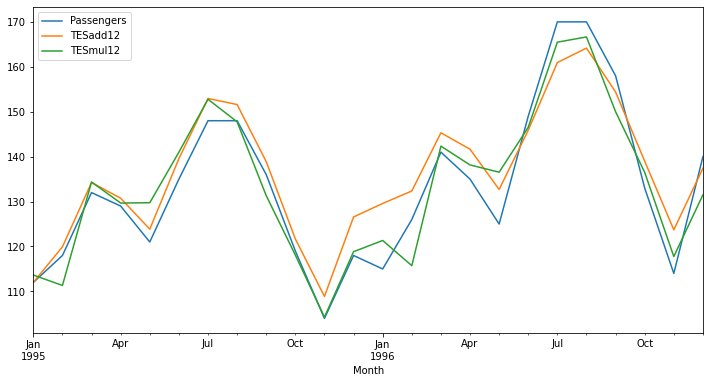

In [342]:
AP_EST[['Passengers','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x', tight=True)

 ## Evaluate the Model

In [343]:
hwm=AP_DES.copy()

In [344]:
#Splitting the data
train_hwm=hwm.head(84)
test_hwm=hwm.tail(12)

In [345]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwm_model_add = ExponentialSmoothing(train_hwm["Passengers"],seasonal="add",trend="add",seasonal_periods=12,damped=True).fit()
pred_hwm_add = hwm_model_add.predict(start = test_hwm.index[0],end = test_hwm.index[-1])

In [346]:
mse_hwm_add=mean_squared_error(test_hwm.Passengers, pred_hwm_add)
mse_hwm_add.round(2)

358.35

In [347]:
rmse_hwm_add = np.sqrt(mean_squared_error(test_hwm.Passengers, pred_hwm_add)).round(2)
rmse_hwm_add

18.93

In [348]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwm_model_mul=ExponentialSmoothing(train_hwm['Passengers'],seasonal="mul",trend="add", seasonal_periods=12).fit()
pred_hwm_mul=hwm_model_mul.predict(start =test_hwm.index[0],end=test_hwm.index[-1])

In [349]:
mse_hwm_mul=mean_squared_error(test_hwm.Passengers, pred_hwm_mul)
mse_hwm_mul.round(2)

166.92

In [350]:
rmse_hwm_mul=np.sqrt(mean_squared_error(test_hwm.Passengers, pred_hwm_mul)).round(2)
rmse_hwm_mul
                                                                                 

12.92

In [351]:
HWM_Additive={"MODEL":pd.Series(["Holt Winters Method_Additive"]),"RMSE":pd.Series([rmse_hwm_add]),"MSE":pd.Series([mse_hwm_add])}
HWM_Additive=pd.DataFrame(HWM_Additive)
HWM_Additive.round(2)


,MODEL,RMSE,MSE
0,Holt Winters Method_Additive,18.93,358.35


In [352]:
HWM_Multiplicative={"MODEL":pd.Series(["Holt Winters Method_Multiplicative"]),"RMSE":pd.Series([rmse_hwm_mul]),"MSE":pd.Series([mse_hwm_mul])}
HWM_Multiplicative=pd.DataFrame(HWM_Multiplicative)
HWM_Multiplicative.round(2)

,MODEL,RMSE,MSE
0,Holt Winters Method_Multiplicative,12.92,166.92


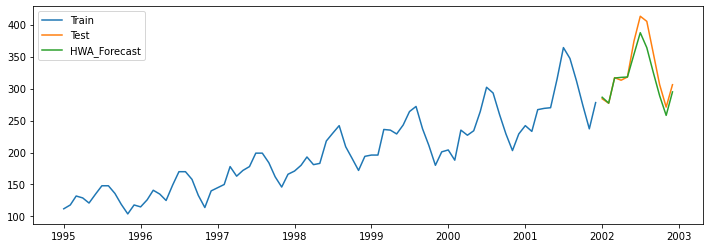

In [353]:
#Plot_Additive
plt.figure(figsize=(12,4))
plt.plot(train_hwm['Passengers'], label='Train')
plt.plot(test_hwm['Passengers'], label='Test')
plt.plot(pred_hwm_add, label='HWA_Forecast')
plt.legend(loc='best')
plt.show()

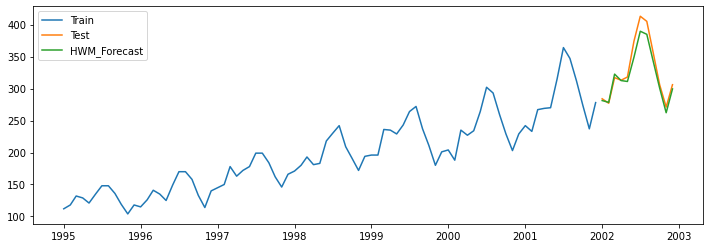

In [354]:
#Plot_Multiplicative
plt.figure(figsize=(12,4))
plt.plot(train_hwm['Passengers'], label='Train')
plt.plot(test_hwm['Passengers'], label='Test')
plt.plot(pred_hwm_mul, label='HWM_Forecast')
plt.legend(loc='best')
plt.show()

 ### ARMA Model

 ## Auto Regressive Model (AR)

 ### Stationary vs Non-stationary Time Series

In [355]:
AR_df=pd.read_csv("D:/Assignments Excel R/assignment 18/Airlines+Data1.csv") #index_col='Month', parse_dates=True)

In [356]:
#AR_df=Airlines_Passengers.copy()
AR_df.head()

,Month,Passengers
0,1/1/1995,112
1,2/1/1995,118
2,3/1/1995,132
3,4/1/1995,129
4,5/1/1995,121


In [195]:
AR_df['Month']=pd.to_datetime(AR_df['Month'])

AR_df.set_index('Month', inplace=True)

AR_df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


 ### 1.Visually checking the Stationarity

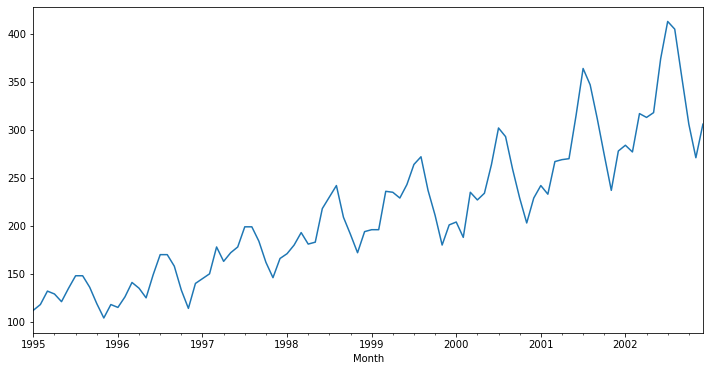

In [196]:
AR_df['Passengers'].plot(figsize=(12,6))
plt.show()

 ### Observation- 
 ##### 1) Trend is not constant.
 ##### 2) Variance is also not constant

 ## 2) Augmented Dickey Fuller Test (Checking Seasonality)
 
Null Hypothesis (H0): The series is not stationary

p-val > 0.05

Alternate Hypothesis (H1): The series is stationary

p-val <= 0.05

 ## Stationary check Method
 ### Duckey Fuller Method

In [197]:
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts

In [198]:
from statsmodels.tsa.stattools import adfuller

#Ho=It is not stationary
#H1=It is stationary
def adf_test(AR_df):    
    result = adfuller(AR_df.dropna())  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    #for key,val in result[4].items():
        #out[f'critical value ({key})']=val
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [199]:
adf_test(AR_df['Passengers'])

Fail to reject the null hypothesis
Data is non-stationary


In [200]:
adf_test=adfuller(AR_df['Passengers'])
adf_test

(1.340247959646705,
 0.9968250481137263,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 626.0084713813505)

p-value (0.99) > critical value(0.05) .

Failed to reject null hypothesis (The series is not stationary)

Hence, the time series is Non-Stationary.



 ## Converting Non-Stationary to Stationary Time Series Methods
 
 ### 1)Rolling Statistics
 ### 2)Transformation Method  
 ### 3)Differencing

In [201]:
df=AR_df.copy()
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


 ### Method- 1 Rolling Statistics

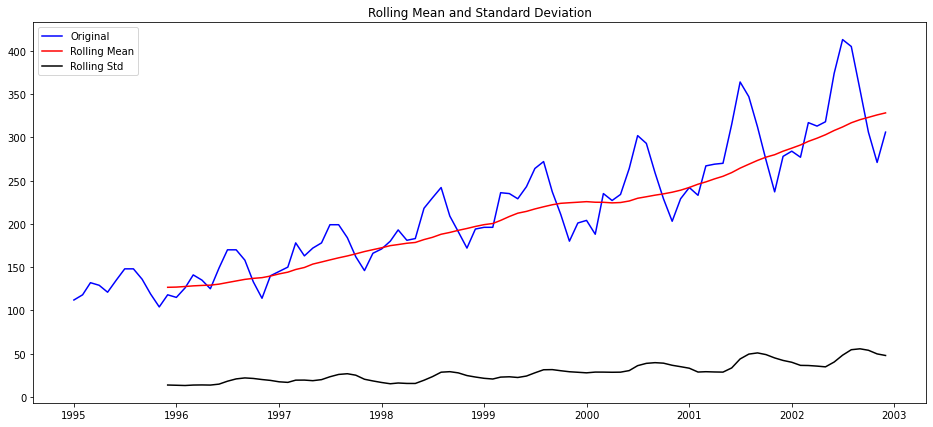

In [202]:
# Determing rolling statistics

rollmean=df.rolling(12).mean()
rollstd=df.rolling(12).std()

plt.figure(figsize=(16,7))
fig =plt.figure(1)

#Plot rolling statistics
orig = plt.plot(df, color='blue', label='Original')
mean=plt.plot(rollmean, color='red',label='Rolling Mean')
std=plt.plot(rollstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

 ## Observation
    
    Rolling Std is constant but Rolling Mean is not constant, it is still data is Non-Stationary 

 ### Method-2 -Transformation 


 ### Log Types
    1) adj_log
    2) adj_sqrt
    3) adj_cbrt

In [203]:
import numpy as np

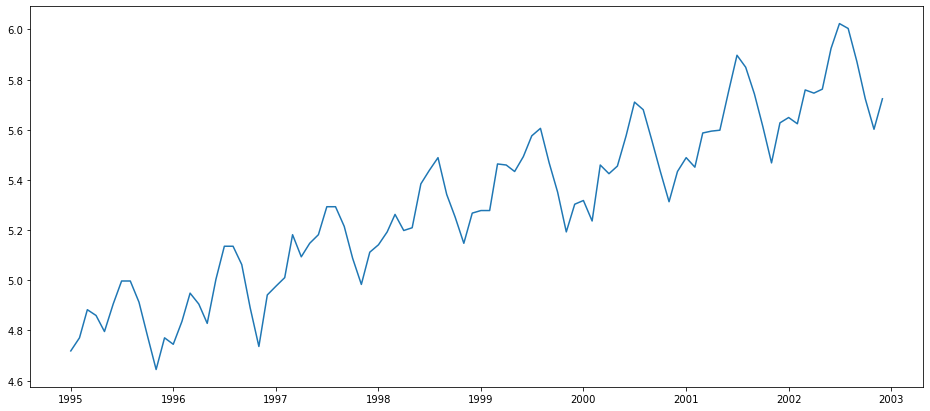

In [204]:
ts_log=np.log(df)

plt.figure(figsize=(16,7))
fig =plt.figure(1)
plt.plot(ts_log)

 ### Still data is not stationary, now we will check decompose seasonal 

 ### Decomposition

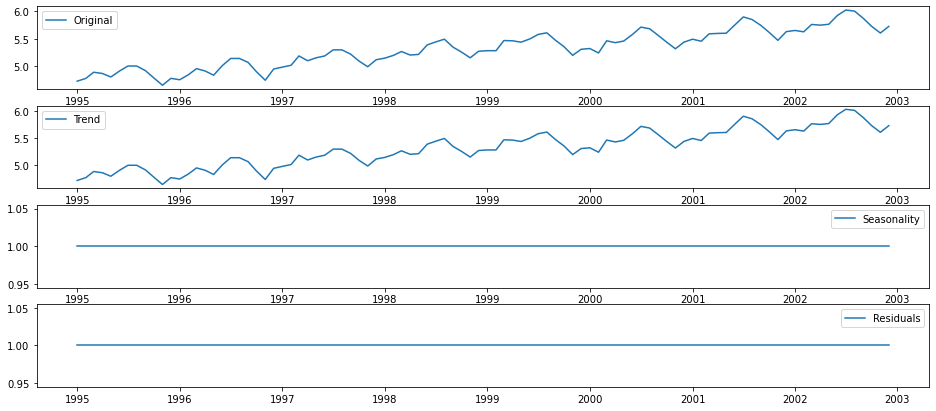

In [205]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, freq=1, model='multiplicative')

trend= decomposition.trend
seasonal= decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig =plt.figure(1)

plt. subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt. subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt. subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

 ### Observation-
Trend Compounds having more contribution in original data. After using log method it still data is Non-Stationary 

 ## Menthod-3- Differencing Mehtod
 
  ### y(t) =y(t)-y(t-1)

In [210]:
ts_test=ts_log_diff1.set_index

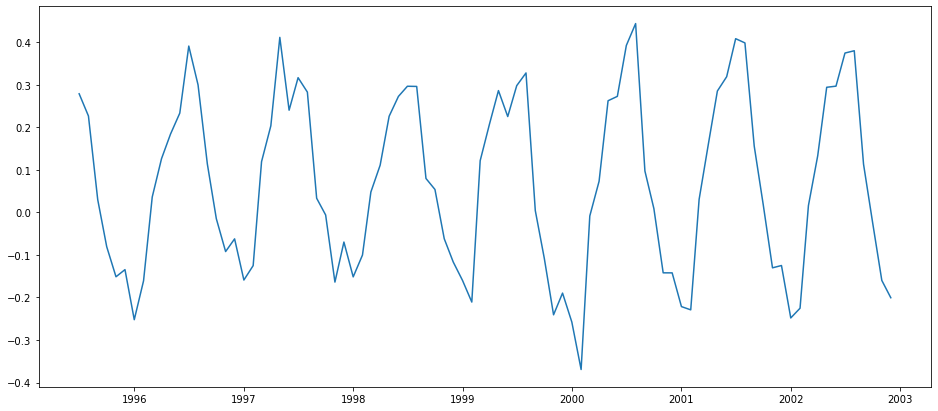

In [211]:
ts_log_diff=ts_log -ts_log.shift(6)

ts_log_diff1=ts_log_diff.dropna() # Removing NaN values from data

plt.figure(figsize=(16,7))
fig =plt.figure(1)

plt.plot(ts_log_diff1)



In [212]:
def adfuller_test(Passengers):
    result=adfuller(Passengers)
    labels=['ADF Test Statistic', 'p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result,labels):
        print(label+': '+str(value))
    if result[1]<=0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [213]:
adfuller_test(ts_log_diff1)

ADF Test Statistic: -2.8921581783954964
p-value: 0.04626752346516127
#Lags Used: 7
Number of Observations Used: 82
Reject the null hypothesis
Data is stationary


### Observation- 
I have used different methods for converting not Stationary to Stationary data,like Rolling Statistics, Differencing Method and Transformation Method, finally I have got stationary data after using Differencing method.


 1)We can see that there is no trend (upward or downward) above grap.
 
 2)It is a horizontal trend.
 
 3)The Mean and Variance is constant.

 ## LLR

In [214]:
#Finding the lag values for AR Model
def LLR_test(mod_1,mod_2, DF=1):
    L1=mod_1.fit().llf
    L2=mod_2.fit().llf
    LR =(2*(L2-L1))
    p= chi2.sf(LR, DF).round(3)
    return p

 ## ACF and PACF for Returns

In [215]:
import statsmodels.graphics.tsaplots as sgt

 ## Autocorrelation function (ACF)

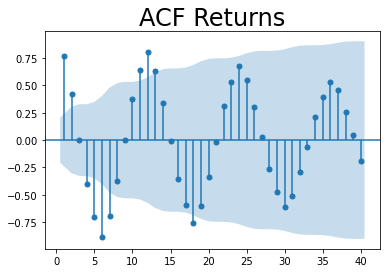

In [216]:
sgt.plot_acf(ts_log_diff1, lags=40, zero = False)
plt.title("ACF Returns", size=24)
plt.show()

 ### Observation
   
 1)The shaded portion is the less significant.
 
 2)With lag 1, the series is just correlated with itself. Hence, correlation=0.76 at lag=1.
 
 3)ACF captures both direct and indirect correlation with the lag time.
 
    
E.g.:- At lag=5, y(t) is directly correlated with y(t-5).

Also, y(t) is indirectly correlated with y(t-5) through y(t-4), y(t-3), y(t-2) and y(t-1).

 ## Partial Autocorrelation function (PACF)

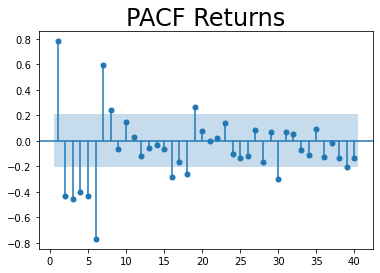

In [217]:
sgt.plot_pacf(ts_log_diff1, lags=40, zero = False, method=('ols'))
plt.title("PACF Returns", size=24)
plt.show()

Observation-

1)The shaded portion is the less significant.

2)With lag 1, the series is just correlated with itself. Hence, correlation=0.8 at lag=1.

3)PACF captures direct correlation with the lag time.

## AR for Returns (Lag Calculation)

In [218]:
from statsmodels.tsa.arima_model import ARMA 

In [219]:
# AR_Lag 1
model_ar1=ARMA(ts_log_diff1, order =(1,0))
results_ar1=model_ar1.fit()
results_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   90
Model:                     ARMA(1, 0)   Log Likelihood                  55.779
Method:                       css-mle   S.D. of innovations              0.130
Date:                Sun, 06 Jun 2021   AIC                           -105.559
Time:                        21:11:39   BIC                            -98.060
Sample:                    07-01-1995   HQIC                          -102.535
                         - 12-01-2002                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0648      0.060      1.079      0.281      -0.053       0.183
ar.L1.Passengers     0.7812      0.066     11.891      0.000       0.652       0.910
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2801           +0.0000j            1.2801            0.0000
-----------------------------------------------------------------------------
"""

In [220]:
# AR_Lag 2
model_ar2=ARMA(ts_log_diff1, order =(2,0))
results_ar2=model_ar2.fit()
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   90
Model:                     ARMA(2, 0)   Log Likelihood                  64.857
Method:                       css-mle   S.D. of innovations              0.117
Date:                Sun, 06 Jun 2021   AIC                           -121.714
Time:                        21:11:40   BIC                           -111.715
Sample:                    07-01-1995   HQIC                          -117.682
                         - 12-01-2002                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0665      0.039      1.720      0.085      -0.009       0.142
ar.L1.Passengers     1.1131      0.095     11.767      0.000       0.928       1.299
ar.L2.Passengers    -0.4288      0.095     -4.512      0.000      -0.615      -0.243
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2980           -0.8046j            1.5272           -0.0883
AR.2            1.2980           +0.8046j            1.5272            0.0883
-----------------------------------------------------------------------------
"""

In [221]:
LLR_test(model_ar1, model_ar2)

0.0

In [222]:
#AR_Lag3
model_ar3=ARMA(ts_log_diff1, order =(3,0))
results_ar3=model_ar3.fit()
print(results_ar3.summary())
print ("LLR test: " + str(LLR_test(model_ar2, model_ar3)))

                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                   90
Model:                     ARMA(3, 0)   Log Likelihood                  75.083
Method:                       css-mle   S.D. of innovations              0.104
Date:                Sun, 06 Jun 2021   AIC                           -140.166
Time:                        21:11:43   BIC                           -127.667
Sample:                    07-01-1995   HQIC                          -135.126
                         - 12-01-2002                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0681      0.024      2.820      0.005       0.021       0.115
ar.L1.Passengers     0.9209      0.092      9.970      0.000       0.740       1.102
ar.L2.Passengers     0.0755 

In [223]:
#AR_Lag4
model_ar4=ARMA(ts_log_diff1, order =(4,0))
results_ar4=model_ar4.fit()
print(results_ar4.summary())
print ("LLR test: " + str(LLR_test(model_ar3, model_ar4)))

                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                   90
Model:                     ARMA(4, 0)   Log Likelihood                  82.772
Method:                       css-mle   S.D. of innovations              0.095
Date:                Sun, 06 Jun 2021   AIC                           -153.545
Time:                        21:11:45   BIC                           -138.546
Sample:                    07-01-1995   HQIC                          -147.496
                         - 12-01-2002                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0688      0.016      4.301      0.000       0.037       0.100
ar.L1.Passengers     0.7384      0.095      7.748      0.000       0.552       0.925
ar.L2.Passengers     0.1132 

In [224]:
#AR_Lag5
model_ar5=ARMA(ts_log_diff1, order =(5,0))
results_ar5=model_ar5.fit()
print(results_ar5.summary())
print ("LLR test: " + str(LLR_test(model_ar4, model_ar5)))

                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                   90
Model:                     ARMA(5, 0)   Log Likelihood                  91.173
Method:                       css-mle   S.D. of innovations              0.086
Date:                Sun, 06 Jun 2021   AIC                           -168.346
Time:                        21:11:47   BIC                           -150.847
Sample:                    07-01-1995   HQIC                          -161.290
                         - 12-01-2002                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0682      0.010      6.619      0.000       0.048       0.088
ar.L1.Passengers     0.5681      0.095      5.992      0.000       0.382       0.754
ar.L2.Passengers     0.0840 

In [225]:
#AR_Lag6
model_ar6=ARMA(ts_log_diff1, order =(6,0))
results_ar6=model_ar6.fit()
print(results_ar6.summary())
print ("LLR test: " + str(LLR_test(model_ar5, model_ar6)))

                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                   90
Model:                     ARMA(6, 0)   Log Likelihood                 120.352
Method:                       css-mle   S.D. of innovations      612611542.556
Date:                Sun, 06 Jun 2021   AIC                           -224.705
Time:                        21:11:52   BIC                           -204.706
Sample:                    07-01-1995   HQIC                          -216.640
                         - 12-01-2002                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0677      0.004     17.914      0.000       0.060       0.075
ar.L1.Passengers     0.2401        nan        nan        nan         nan         nan
ar.L2.Passengers     0.0150 

In [226]:
#AR_Lag7
model_ar7=ARMA(ts_log_diff1, order =(7,0))
results_ar7=model_ar7.fit()
print(results_ar7.summary())
print ("LLR test: " + str(LLR_test(model_ar6, model_ar7)))

                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                   90
Model:                     ARMA(7, 0)   Log Likelihood                 145.752
Method:                       css-mle   S.D. of innovations              0.045
Date:                Sun, 06 Jun 2021   AIC                           -273.505
Time:                        21:11:57   BIC                           -251.006
Sample:                    07-01-1995   HQIC                          -264.432
                         - 12-01-2002                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0661      0.008      8.519      0.000       0.051       0.081
ar.L1.Passengers     0.7091      0.085      8.325      0.000       0.542       0.876
ar.L2.Passengers     0.0030 

In [227]:
#AR_Lag8
model_ar8=ARMA(ts_log_diff1, order =(8,0))
results_ar8=model_ar8.fit()
print(results_ar8.summary())
print ("LLR test: " + str(LLR_test(model_ar7, model_ar8)))

                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                   90
Model:                     ARMA(8, 0)   Log Likelihood                 148.124
Method:                       css-mle   S.D. of innovations              0.044
Date:                Sun, 06 Jun 2021   AIC                           -276.247
Time:                        21:12:08   BIC                           -251.249
Sample:                    07-01-1995   HQIC                          -266.166
                         - 12-01-2002                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0651      0.010      6.662      0.000       0.046       0.084
ar.L1.Passengers     0.5679      0.104      5.455      0.000       0.364       0.772
ar.L2.Passengers     0.2164 

 ## Observation
    P values very high moving to Model7  to Model8, there is no model improvments. 
    Model 7 is good values for P.

 ## Analysing the Residuals
    

In [228]:
ts_log_diff1['res_ret']=results_ar6.resid

In [229]:
ts_log_diff1.res_ret.mean()

0.0019065197025312152

In [230]:
ts_log_diff1.res_ret.var()

0.003750597381035863

In [231]:
sts.adfuller(ts_log_diff1.res_ret)

(-4.4171630054175735,
 0.00027674653067593676,
 1,
 88,
 {'1%': -3.506944401824286,
  '5%': -2.894989819214876,
  '10%': -2.584614550619835},
 -243.43788138907036)

 ## ACF Of Residuals for Returns

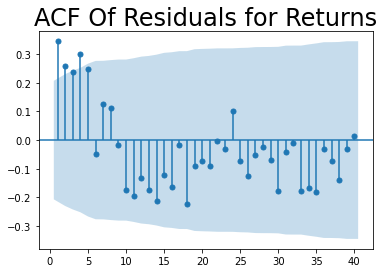

In [234]:
sgt.plot_acf(ts_log_diff1.res_ret, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

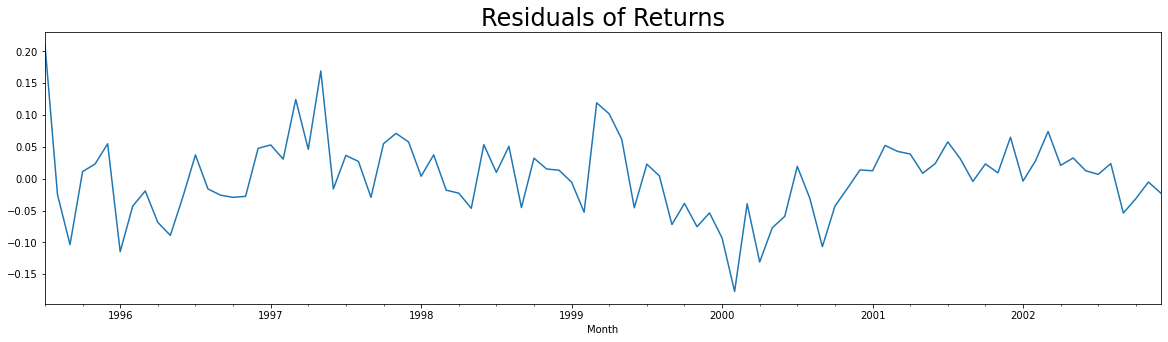

In [237]:
ts_log_diff1.res_ret.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

 ## Building the Auto Regressive Model(AR)

In [238]:
from statsmodels.tsa.arima_model import ARIMA

In [239]:
len(ts_log_diff1)

90

In [240]:
train_len=78

In [241]:
# Splitting ts_log_diff1
train_AR=ts_log_diff1.iloc[:78]
test_AR=ts_log_diff1.iloc[78:]

In [243]:
model = ARIMA(train_AR['Passengers'],order=(6,0,0))
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   78
Model:                     ARMA(6, 0)   Log Likelihood                 106.190
Method:                       css-mle   S.D. of innovations              0.059
Date:                Sun, 06 Jun 2021   AIC                           -196.381
Time:                        21:18:33   BIC                           -177.527
Sample:                    07-01-1995   HQIC                          -188.833
                         - 12-01-2001                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0671      0.005     14.874      0.000       0.058       0.076
ar.L1.Passengers     0.2610      0.075      3.502      0.000       0.115       0.407
ar.L2.Passengers     0.0263      0.079      0.335      0.737      -0.128       0.180
ar.L3.Passengers    -0.0664      0.082     -0.811      0.417      -0.227       0.094
ar.L4.Passengers    -0.0155      0.078     -0.198      0.843      -0.169       0.138
ar.L5.Passengers    -0.0067      0.079     -0.084      0.933      -0.162       0.149
ar.L6.Passengers    -0.7328      0.072    -10.241      0.000      -0.873      -0.593
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8767           -0.4893j            1.0040           -0.0810
AR.2            0.8767           +0.4893j            1.0040            0.0810
AR.3            0.0596           -1.0657j            1.0673           -0.2411
AR.4            0.0596           +1.0657j            1.0673            0.2411
AR.5           -0.9408           -0.5508j            1.0902           -0.4157
AR.6           -0.9408           +0.5508j            1.0902            0.4157
-----------------------------------------------------------------------------
"""

In [244]:
model_fit = model.fit()
model_fit.params

const               0.067082
ar.L1.Passengers    0.260953
ar.L2.Passengers    0.026337
ar.L3.Passengers   -0.066360
ar.L4.Passengers   -0.015521
ar.L5.Passengers   -0.006657
ar.L6.Passengers   -0.732763
dtype: float64

 ## Observation-

constant = 0.067082 . Because we saw in the Stationary time series that the mean was almost close to zero.

Coefficient =-0.732771	

The AR model has only one lag or p=6. Hence, we can represent the model as AR(6)

 # Use Model to Predict_AR Model

In [245]:
# Obtain Predicted values
start=len(train_AR)
end=len(ts_log_diff1)-1
predictions_ar=results.predict(start=start, end=end, dynamic=False, typ='levels')
predictions_ar=predictions_ar.rename('ARIMA(6,0,0) Predictions')

In [246]:
# Compare predictions to expected values #<11.10
for i in range(len(predictions_ar)):
    print(f"predicted={predictions_ar[i]:<11.10}, expected={test_AR['Passengers'][i]}")

predicted=-0.2385516462, expected=-0.2481796294755343
predicted=-0.2471581052, expected=-0.22530727375952075
predicted=-0.07181314788, expected=0.015898586067797815
predicted=0.08279809542, expected=0.13307508415208247
predicted=0.2390802309, expected=0.2939912416450454
predicted=0.2692240342, expected=0.29663468372389534
predicted=0.3515238587, expected=0.3744733547998269
predicted=0.366162718, expected=0.3798695609192002
predicted=0.2382087612, expected=0.11321601559813566
predicted=0.084941208, expected=-0.022618088587772256
predicted=-0.07539167801, expected=-0.1599325619004759
predicted=-0.135640015, expected=-0.20067069546215155


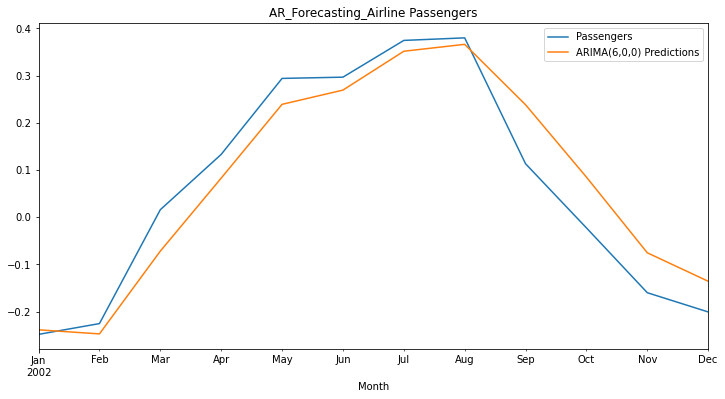

In [247]:
# Plot predictions against known values
title = 'AR_Forecasting_Airline Passengers'
ylabel='Passengers'
xlabel='' 

test_AR['Passengers'].plot(legend=True,figsize=(12,6),title=title)
predictions_ar.plot(legend=True)
plt.show()

 ## Retrain the model on the full data, and forecast the future

In [248]:
model=ARIMA(df['Passengers'], order=(6,0,0))
results=model.fit()
fcast_ar=results.predict(len(df), len(df)+11, typ='levels').rename('ARIMA(6,0,0) Forecast')

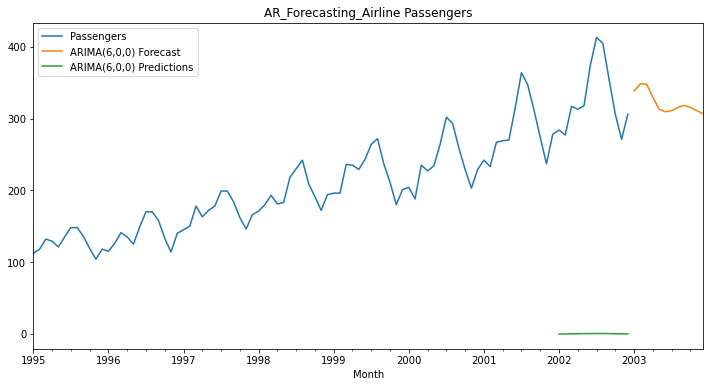

In [249]:
# Plot predictions against known values
title = 'AR_Forecasting_Airline Passengers'
ylabel='Passengers'
xlabel='Period' 

df['Passengers'].plot(legend=True,figsize=(12,6),title=title)
fcast_ar.plot(legend=True)
predictions_ar.plot(legend=True)
plt.show()

 ## 12 Month Forecast Values for AR Model

In [250]:
fcast_ar

2003-01-01    338.508345
2003-02-01    348.388230
2003-03-01    347.998984
2003-04-01    329.461342
2003-05-01    313.149957
2003-06-01    309.480299
2003-07-01    310.927358
2003-08-01    315.651389
2003-09-01    318.283452
2003-10-01    315.596190
2003-11-01    311.062601
2003-12-01    306.731941
Freq: MS, Name: ARIMA(6,0,0) Forecast, dtype: float64

 ## MSE and RMSE_AR Model

In [251]:
AR=df.copy()

In [252]:
Train_ar=AR.head(84)
Test_ar=AR.tail(12)

In [253]:
#MSE
mse_ar=mean_squared_error(Test_ar.Passengers, fcast_ar)
mse_ar.round(2)

2911.12

In [254]:
rmse_ar=np.sqrt(mean_squared_error(Test_ar.Passengers, fcast_ar)).round(2)
rmse_ar

53.95

In [255]:
AR={"MODEL":pd.Series(["AR_Model"]),"RMSE":pd.Series([rmse_ar]),"MSE":pd.Series([mse_ar])}
AR=pd.DataFrame(AR)
AR.round(2)

,MODEL,RMSE,MSE
0,AR_Model,53.95,2911.12


 ## MA for Returns (Lag Calculation)

In [256]:
# MA_Lag 1
model_ma1=ARMA(ts_log_diff1['Passengers'], order =(0,1)) #ts_log_diff1
results_ma1=model_ma1.fit()
results_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   90
Model:                     ARMA(0, 1)   Log Likelihood                  51.301
Method:                       css-mle   S.D. of innovations              0.134
Date:                Sun, 06 Jun 2021   AIC                            -96.601
Time:                        21:19:05   BIC                            -89.102
Sample:                    07-01-1995   HQIC                           -93.577
                         - 12-01-2002                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0667      0.028      2.387      0.017       0.012       0.121
ma.L1.Passengers     0.9867      0.064     15.482      0.000       0.862       1.112
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0135           +0.0000j            1.0135            0.5000
-----------------------------------------------------------------------------
"""

In [257]:
# MA_Lag 2
model_ma2=ARMA(ts_log_diff1['Passengers'], order =(0,2))
results_ma2=model_ma2.fit()
results_ma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   90
Model:                     ARMA(0, 2)   Log Likelihood                  73.160
Method:                       css-mle   S.D. of innovations              0.103
Date:                Sun, 06 Jun 2021   AIC                           -138.321
Time:                        21:19:07   BIC                           -128.321
Sample:                    07-01-1995   HQIC                          -134.288
                         - 12-01-2002                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0644      0.032      2.018      0.044       0.002       0.127
ma.L1.Passengers     0.9792      0.109      9.019      0.000       0.766       1.192
ma.L2.Passengers     0.9998      0.204      4.894      0.000       0.599       1.400
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.4897           -0.8720j            1.0001           -0.3314
MA.2           -0.4897           +0.8720j            1.0001            0.3314
-----------------------------------------------------------------------------
"""

In [258]:
LLR_test(model_ma1, model_ma2)

0.0

In [259]:
#MR_Lag3
model_ma3=ARMA(ts_log_diff1['Passengers'], order =(0,3))
results_ma3=model_ma3.fit()
print(results_ma3.summary())
print ("LLR test: " + str(LLR_test(model_ma2, model_ma3)))

                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                   90
Model:                     ARMA(0, 3)   Log Likelihood                  75.453
Method:                       css-mle   S.D. of innovations              0.101
Date:                Sun, 06 Jun 2021   AIC                           -140.906
Time:                        21:19:09   BIC                           -128.407
Sample:                    07-01-1995   HQIC                          -135.865
                         - 12-01-2002                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0630      0.038      1.664      0.096      -0.011       0.137
ma.L1.Passengers     1.1593      0.107     10.866      0.000       0.950       1.368
ma.L2.Passengers     1.1887 

In [260]:
#MR_Lag4
model_ma4=ARMA(ts_log_diff1['Passengers'], order =(0,4))
results_ma4=model_ma4.fit()
print(results_ma4.summary())
print ("LLR test: " + str(LLR_test(model_ma3, model_ma4)))

                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                   90
Model:                     ARMA(0, 4)   Log Likelihood                  78.335
Method:                       css-mle   S.D. of innovations              0.097
Date:                Sun, 06 Jun 2021   AIC                           -144.670
Time:                        21:19:12   BIC                           -129.671
Sample:                    07-01-1995   HQIC                          -138.621
                         - 12-01-2002                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0652      0.034      1.899      0.058      -0.002       0.133
ma.L1.Passengers     1.4165      0.121     11.735      0.000       1.180       1.653
ma.L2.Passengers     1.0579 

 ## Observation
    q values very high moving to Model3  to Model4, there is no model improvments. 
    
    Model 4 is good values for q.

# Analysing the Residuals

In [261]:
ts_log_diff1['res_ret']=results_ar4.resid

In [262]:
ts_log_diff1.res_ret.mean()

0.0004276614077946714

In [263]:
ts_log_diff1.res_ret.var()

0.009578019007210494

In [264]:
sts.adfuller(ts_log_diff1.res_ret)

(-2.2857018652059873,
 0.176620878815345,
 10,
 79,
 {'1%': -3.5159766913976376,
  '5%': -2.898885703483903,
  '10%': -2.5866935058484217},
 -231.61278838182653)

 ## ACF Of Residuals for Returns

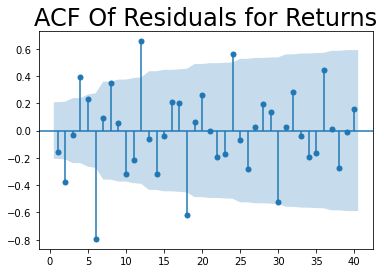

In [265]:
sgt.plot_acf(ts_log_diff1.res_ret, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

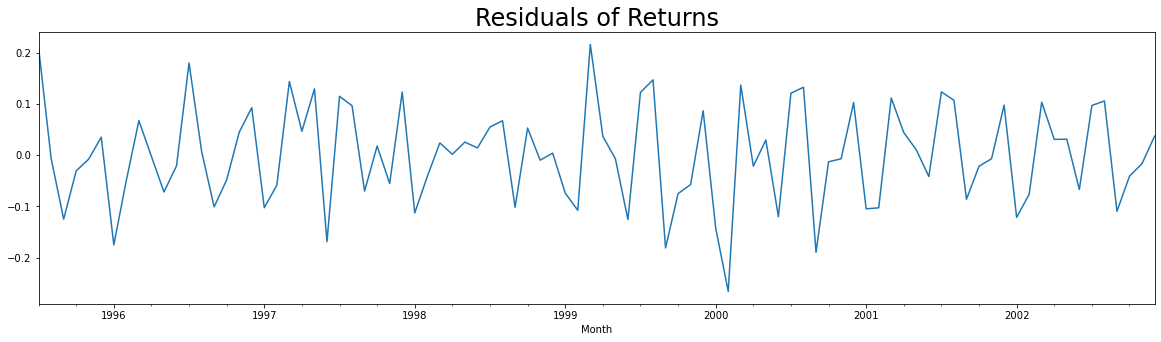

In [266]:
ts_log_diff1.res_ret.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

 ## Building the Moving Average (MA) Model
 
 q parameter = 4 MA(4) model
 
 p = 0 and d = 0 As we are not considering these two parameters in this model.

In [267]:
# Splitting ts_log_diff1
train_MA=ts_log_diff1.iloc[:78]
test_MA=ts_log_diff1.iloc[78:]

In [268]:
model = ARIMA(train_MA['Passengers'],order=(0,0,4))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   78
Model:                     ARMA(0, 4)   Log Likelihood                  66.471
Method:                       css-mle   S.D. of innovations              0.097
Date:                Sun, 06 Jun 2021   AIC                           -120.942
Time:                        21:19:30   BIC                           -106.802
Sample:                    07-01-1995   HQIC                          -115.282
                         - 12-01-2001                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0657      0.035      1.891      0.059      -0.002       0.134
ma.L1.Passengers     1.4153      0.328      4.321      0.000       0.773       2.057
ma.L2.Passengers     1.0415      0.137      7.580      0.000       0.772       1.311
ma.L3.Passengers     0.1876      0.276      0.679      0.497      -0.354       0.729
ma.L4.Passengers    -0.4379      0.164     -2.669      0.008      -0.759      -0.116
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0005           -0.0000j            1.0005           -0.5000
MA.2           -0.4269           -0.9043j            1.0000           -0.3202
MA.3           -0.4269           +0.9043j            1.0000            0.3202
MA.4            2.2828           -0.0000j            2.2828           -0.0000
-----------------------------------------------------------------------------
"""

In [269]:
model_fit = model.fit()
model_fit.params

const               0.065724
ma.L1.Passengers    1.415252
ma.L2.Passengers    1.041520
ma.L3.Passengers    0.187645
ma.L4.Passengers   -0.437855
dtype: float64

## Observation-
constant = 0.065718 . Because we saw in the Stationary time series that the mean was almost close to zero.

Coefficient =-0.437957

The MA model has only one lag or p=2. Hence, we can represent the model as AR(2)

 ### Converting Non-Stationary to Stationary Time Series

 ## Use Model to Predict_MA Model

In [270]:
# Obtain Predicted values
start=len(train_MA)
end=len(ts_log_diff1)-1
predictions=results.predict(start=start, end=end, dynamic=False, typ='levels')
predictions=predictions.rename('ARIMA(0,0,4) Predictions')

In [271]:
# Compare predictions to expected values #<11.10
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test_AR['Passengers'][i]}")

predicted=-0.1232307324, expected=-0.2481796294755343
predicted=-0.05834575541, expected=-0.22530727375952075
predicted=0.09777086429, expected=0.015898586067797815
predicted=0.100976009, expected=0.13307508415208247
predicted=0.06572433789, expected=0.2939912416450454
predicted=0.06572433789, expected=0.29663468372389534
predicted=0.06572433789, expected=0.3744733547998269
predicted=0.06572433789, expected=0.3798695609192002
predicted=0.06572433789, expected=0.11321601559813566
predicted=0.06572433789, expected=-0.022618088587772256
predicted=0.06572433789, expected=-0.1599325619004759
predicted=0.06572433789, expected=-0.20067069546215155


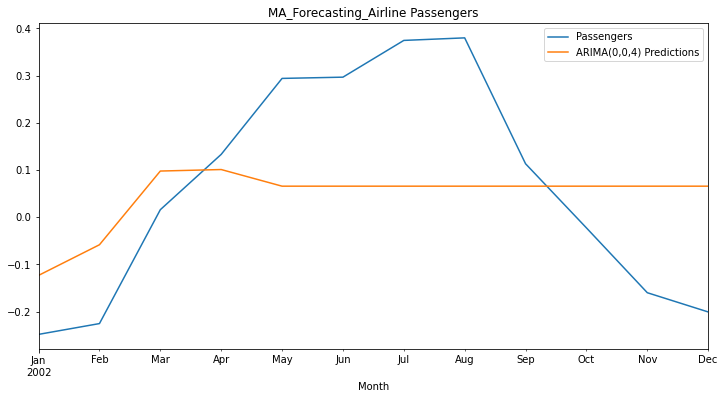

In [272]:
# Plot predictions against known values
title = 'MA_Forecasting_Airline Passengers'
ylabel='Passengers'
xlabel='' 

test_MA['Passengers'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
plt.show()

 ## Retrain the model on the full data, and forecast the future

In [273]:
model=ARIMA(df['Passengers'], order=(0,0,4))
results=model.fit(disp=-1)
fcast_ma=results.predict(len(df), len(df)+11, typ='levels').rename('ARIMA(0,0,4) Forecast')

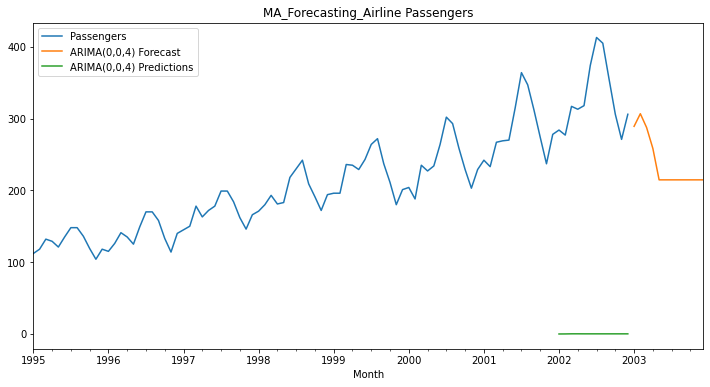

In [274]:
# Plot predictions against known values
title = 'MA_Forecasting_Airline Passengers'
ylabel='Passengers'
xlabel='Period' 

df['Passengers'].plot(legend=True,figsize=(12,6),title=title)
fcast_ma.plot(legend=True)
predictions.plot(legend=True)
plt.show()

 ## 12 Month Forecast Values for MA Model

In [275]:
fcast_ma

2003-01-01    289.183599
2003-02-01    306.762741
2003-03-01    287.500661
2003-04-01    258.401607
2003-05-01    214.615489
2003-06-01    214.615489
2003-07-01    214.615489
2003-08-01    214.615489
2003-09-01    214.615489
2003-10-01    214.615489
2003-11-01    214.615489
2003-12-01    214.615489
Freq: MS, Name: ARIMA(0,0,4) Forecast, dtype: float64

 ## MSE and RMSE_MA Model

In [276]:
MA=df.copy()

In [277]:
Train_ma=MA.head(84)
Test_ma=MA.tail(12)

In [278]:
#MSE
mse_ma=mean_squared_error(Test_ma.Passengers, fcast_ma)
mse_ma.round(2)


13003.97

In [279]:
#RMSE
rmse_ma=np.sqrt(mean_squared_error(Test_ma.Passengers, fcast_ma)).round(2)
rmse_ma

114.03

In [280]:
MA={"MODEL":pd.Series(["AR_Model"]),"RMSE":pd.Series([rmse_ma]),"MSE":pd.Series([mse_ma])}
MA=pd.DataFrame(MA)
MA.round(2)

,MODEL,RMSE,MSE
0,AR_Model,114.03,13003.97


## Autoregressive Integrated Moving Averages (ARIMA)
Recall that an AR(1) model follows the formula

     𝑦𝑡=𝑐+𝜙1𝑦𝑡−1+𝜀𝑡 
while an MA(1) model follows the formula

     𝑦𝑡=𝜇+𝜃1𝜀𝑡−1+𝜀𝑡 
where  𝑐  is a constant,  𝜇  is the expectation of  𝑦𝑡  (often assumed to be zero),  𝜙1  is the AR lag coefficient,  𝜃1  (theta-sub-one) is the MA lag coefficient, and  𝜀  (epsilon) is white noise.

An ARMA(1,1) model therefore follows

     𝑦𝑡=𝑐+𝜙1𝑦𝑡−1+𝜃1𝜀𝑡−1+𝜀𝑡

In [281]:
#from pmdarima import auto_arima # for determining ARIMA orders

In [282]:
#stepwise_fit = auto_arima(df['Passengers'], start_p=0, start_q=0,
                          #max_p=6, max_q=4, m=12,
                          #seasonal=False,
                          #d=None, trace=True,
                          #error_action='ignore',   # we don't want to know if an order does not work
                          #suppress_warnings=True,  # we don't want convergence warnings
                          #stepwise=True)           # set to stepwise

#stepwise_fit.summary()

## Building the ARIMA Model

In [284]:
# Splitting ts_log_diff1
train_ARIMA=ts_log_diff1.iloc[:78]
test_ARIMA=ts_log_diff1.iloc[78:]

In [285]:
model = ARIMA(train_ARIMA['Passengers'],order=(6,1,4))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                   77
Model:                 ARIMA(6, 1, 4)   Log Likelihood                 111.074
Method:                       css-mle   S.D. of innovations                nan
Date:                Sun, 06 Jun 2021   AIC                           -198.148
Time:                        21:21:28   BIC                           -170.022
Sample:                    08-01-1995   HQIC                          -186.898
                         - 12-01-2001                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0011        nan        nan        nan         nan         nan
ar.L1.D.Passengers     0.0740        nan        nan        nan         nan         nan
ar.L2.D.Passengers     0.0009        nan        nan        nan         nan         nan
ar.L3.D.Passengers     0.0125   4.22e-07   2.95e+04      0.000       0.012       0.012
ar.L4.D.Passengers    -0.0414        nan        nan        nan         nan         nan
ar.L5.D.Passengers    -0.0138        nan        nan        nan         nan         nan
ar.L6.D.Passengers    -0.9030        nan        nan        nan         nan         nan
ma.L1.D.Passengers    -0.4253      0.122     -3.472      0.001      -0.665      -0.185
ma.L2.D.Passengers     0.0727      0.120      0.608      0.543      -0.162       0.307
ma.L3.D.Passengers    -0.2920      0.121     -2.421      0.015      -0.528      -0.056
ma.L4.D.Passengers     0.2084      0.130      1.604      0.109      -0.046       0.463
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8667           -0.4988j            1.0000           -0.0831
AR.2            0.8667           +0.4988j            1.0000            0.0831
AR.3           -0.8822           -0.5249j            1.0265           -0.4146
AR.4           -0.8822           +0.5249j            1.0265            0.4146
AR.5            0.0079           -1.0251j            1.0251           -0.2488
AR.6            0.0079           +1.0251j            1.0251            0.2488
MA.1           -0.7163           -1.2023j            1.3995           -0.3355
MA.2           -0.7163           +1.2023j            1.3995            0.3355
MA.3            1.4168           -0.6652j            1.5652           -0.0699
MA.4            1.4168           +0.6652j            1.5652            0.0699
-----------------------------------------------------------------------------
"""

In [286]:
model_fit = model.fit()
model_fit.params

const                 0.001134
ar.L1.D.Passengers    0.074034
ar.L2.D.Passengers    0.000855
ar.L3.D.Passengers    0.012453
ar.L4.D.Passengers   -0.041374
ar.L5.D.Passengers   -0.013778
ar.L6.D.Passengers   -0.903003
ma.L1.D.Passengers   -0.425265
ma.L2.D.Passengers    0.072736
ma.L3.D.Passengers   -0.291976
ma.L4.D.Passengers    0.208401
dtype: float64

 ## Observation-
constant = 0.001134 . Because we saw in the Stationary time series that the mean was almost close to zero.

Coefficient = AR=-0.902963 and MA=0.208429

The ARIMA model has e lag or 6-1-4. Hence, we can represent the model as ARIMA(6-1-4)

 ## Use Model to Predict_ARIMA Model

In [287]:
# Obtain Predicted values
start=len(train_ARIMA)
end=len(ts_log_diff1)-1
predictions=results.predict(start=start, end=end, dynamic=False, typ='levels')
predictions=predictions.rename('ARIMA(6,1,4) Predictions')

In [288]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test_ARIMA['Passengers'][i]}")

predicted=-0.2154882901, expected=-0.2481796294755343
predicted=-0.1913841185, expected=-0.22530727375952075
predicted=0.0231569555, expected=0.015898586067797815
predicted=0.1731055658, expected=0.13307508415208247
predicted=0.3248305159, expected=0.2939912416450454
predicted=0.33634899 , expected=0.29663468372389534
predicted=0.4138664838, expected=0.3744733547998269
predicted=0.3926998663, expected=0.3798695609192002
predicted=0.1913891817, expected=0.11321601559813566
predicted=0.04158276149, expected=-0.022618088587772256
predicted=-0.1081964962, expected=-0.1599325619004759
predicted=-0.1303924706, expected=-0.20067069546215155


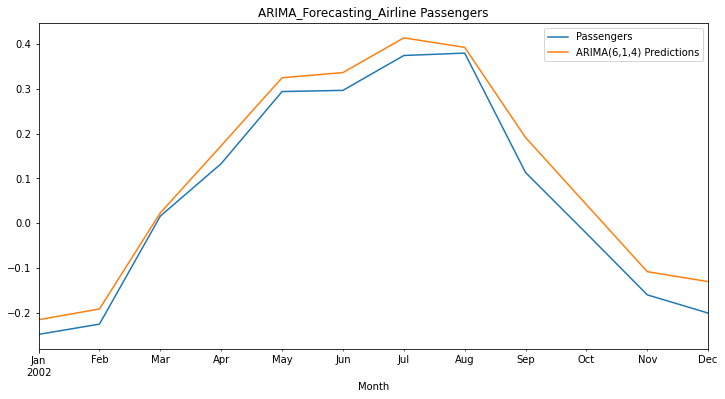

In [289]:
# Plot predictions against known values
title = 'ARIMA_Forecasting_Airline Passengers'
ylabel='Passengers'
xlabel='' 

test_ARIMA['Passengers'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
plt.show()

 ## Retrain the model on the full data, and forecast the future¶

In [290]:
model=ARIMA(df['Passengers'], order=(6,1,4))
results=model.fit(disp=-1)
fcast_ARIMA=results.predict(len(df), len(df)+11, typ='levels').rename('ARIMA(6,1,4) Forecast')

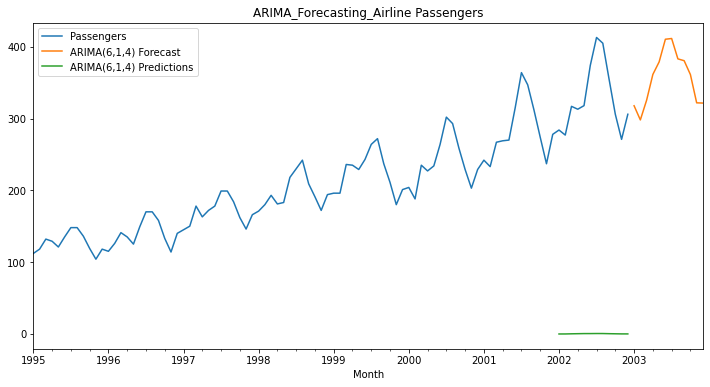

In [291]:
# Plot predictions against known values
title = 'ARIMA_Forecasting_Airline Passengers'
ylabel='Passengers'
xlabel='Period' 

df['Passengers'].plot(legend=True,figsize=(12,6),title=title)
fcast_ARIMA.plot(legend=True)
predictions.plot(legend=True)
plt.show()




In [292]:
fcast_ARIMA

2003-01-01    317.817651
2003-02-01    298.094626
2003-03-01    325.525038
2003-04-01    361.486867
2003-05-01    378.899994
2003-06-01    410.525002
2003-07-01    411.557443
2003-08-01    383.158086
2003-09-01    380.622878
2003-10-01    361.296661
2003-11-01    321.914470
2003-12-01    321.575975
Freq: MS, Name: ARIMA(6,1,4) Forecast, dtype: float64

 ## Evaluate the Model

In [293]:
ARIMA=df.copy()

In [294]:
Train_arima=ARIMA.head(84)
Test_arima=ARIMA.tail(12)

In [295]:
mse_arima=mean_squared_error(Test_arima, fcast_ARIMA)
mse_arima.round(2)

1340.29

In [296]:
rmse_arima=np.sqrt(mean_squared_error(Test_arima.Passengers, fcast_ARIMA)).round(2)
rmse_arima

36.61

In [297]:
ARIMA={"MODEL":pd.Series(["ARIMA_Model"]),"RMSE":pd.Series([rmse_arima]),"MSE":pd.Series([mse_arima])}
ARIMA=pd.DataFrame(ARIMA)
ARIMA.round(2)

,MODEL,RMSE,MSE
0,ARIMA_Model,36.61,1340.29


 ## Seasonal Auto Regressive Integrated Moving Average (SARIMA)

In [298]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [299]:
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


 ## Building the SARIMA Model

In [300]:
# Splitting df
train_SM=df.head(84)
test_SM=df.tail(12)

In [301]:
model = SARIMAX(train_SM['Passengers'],order=(6,1,4),seasonal_order=(6,1,4,12))
results = model.fit()
results.summary()

#model = SARIMAX(train_SM, order=(6,1,4), seasonal_order=(6,1,4,12))

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   84
Model:             SARIMAX(6, 1, 4)x(6, 1, 4, 12)   Log Likelihood                -254.296
Date:                            Sun, 06 Jun 2021   AIC                            550.591
Time:                                    21:23:34   BIC                            598.107
Sample:                                01-01-1995   HQIC                           569.487
                                     - 12-01-2001                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0619      9.813      0.006      0.995     -19.172      19.296
ar.L2         -0.2859      7.364     -0.039      0.969     -14.719      14.147
ar.L3          0.5577      8.878      0.063      0.950     -16.842      17.957
ar.L4         -0.0318      2.013     -0.016      0.987      -3.978       3.914
ar.L5         -0.0077      1.897     -0.004      0.997      -3.725       3.709
ar.L6          0.1279      1.697      0.075      0.940      -3.199       3.455
ma.L1         -0.3292      9.844     -0.033      0.973     -19.623      18.965
ma.L2          0.3989      4.735      0.084      0.933      -8.881       9.679
ma.L3         -0.8685      8.351     -0.104      0.917     -17.236      15.499
ma.L4          0.1604      2.732      0.059      0.953      -5.195       5.516
ar.S.L12      -0.3810     45.108     -0.008      0.993     -88.792      88.030
ar.S.L24       0.0226     11.034      0.002      0.998     -21.604      21.649
ar.S.L36       0.0448      6.235      0.007      0.994     -12.175      12.265
ar.S.L48      -0.1208      4.967     -0.024      0.981      -9.857       9.615
ar.S.L60       0.8385      5.614      0.149      0.881     -10.165      11.842
ar.S.L72       0.5703     41.463      0.014      0.989     -80.696      81.837
ma.S.L12      -0.5607     76.730     -0.007      0.994    -150.948     149.826
ma.S.L24       0.1868     67.031      0.003      0.998    -131.192     131.565
ma.S.L36      -0.2277     83.173     -0.003      0.998    -163.243     162.788
ma.S.L48       0.4068    103.091      0.004      0.997    -201.647     202.461
sigma2         6.7524    461.756      0.015      0.988    -898.273     911.778
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.32
Prob(Q):                              0.88   Prob(JB):                         0.31
Heteroskedasticity (H):               2.47   Skew:                             0.44
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [303]:
model_fit = model.fit()
model_fit.params

ar.L1       0.061903
ar.L2      -0.285851
ar.L3       0.557735
ar.L4      -0.031832
ar.L5      -0.007678
ar.L6       0.127917
ma.L1      -0.329189
ma.L2       0.398897
ma.L3      -0.868457
ma.L4       0.160441
ar.S.L12   -0.380989
ar.S.L24    0.022586
ar.S.L36    0.044845
ar.S.L48   -0.120797
ar.S.L60    0.838490
ar.S.L72    0.570301
ma.S.L12   -0.560667
ma.S.L24    0.186795
ma.S.L36   -0.227707
ma.S.L48    0.406844
sigma2      6.752406
dtype: float64

 ## Use Model to Predict_SARIMA

In [304]:
# Obtain Predicted values
start=len(train_SM)
end=len(df)-1
predictions=results.predict(start=start, end=end, dynamic=False, typ='levels')
predictions=predictions.rename('SARIMA(6,1,4) Predictions')

In [370]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test_SM['Passengers'][i]}")

predicted=299.7432026, expected=284
predicted=283.8378678, expected=277
predicted=339.8370954, expected=317
predicted=324.9053071, expected=313
predicted=344.762841 , expected=318
predicted=371.6485918, expected=374
predicted=421.7426287, expected=413
predicted=407.9516491, expected=405
predicted=372.6490058, expected=355
predicted=335.4754049, expected=306
predicted=305.2039393, expected=271
predicted=341.0455281, expected=306


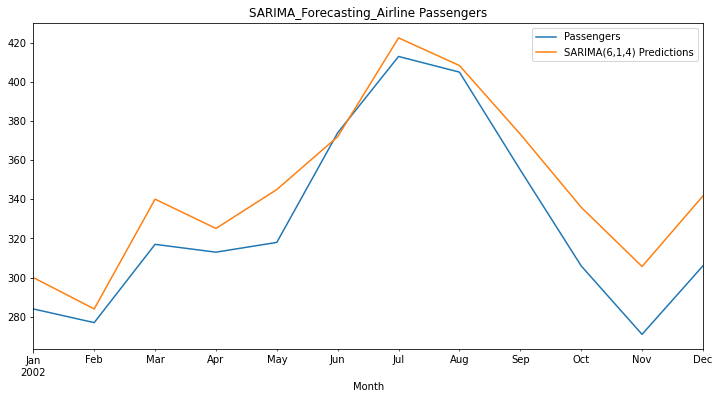

In [305]:
# Plot predictions against known values
title = 'SARIMA_Forecasting_Airline Passengers'
ylabel='Passengers'
xlabel='' 

test_SM['Passengers'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
plt.show()

In [306]:
model=SARIMAX(df['Passengers'], order=(6,1,4))
results=model.fit()
fcast_SARIMA=results.predict(len(df), len(df)+11, typ='levels').rename('SARIMA(6,1,4) Forecast')

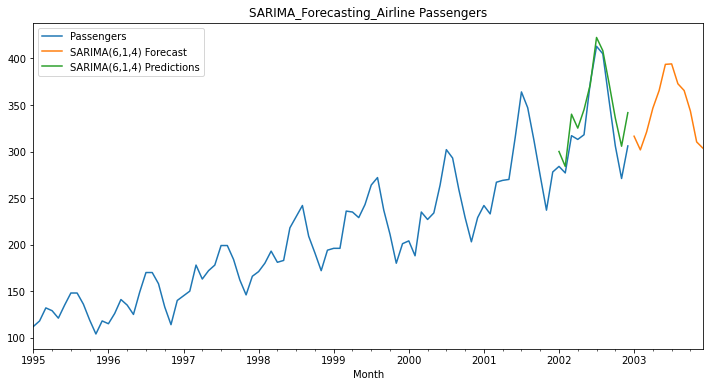

In [307]:
# Plot predictions against known values
title = 'SARIMA_Forecasting_Airline Passengers'
ylabel='Passengers'
xlabel='Period' 

df['Passengers'].plot(legend=True,figsize=(12,6),title=title)
fcast_SARIMA.plot(legend=True)
predictions.plot(legend=True)
plt.show()

 ## Observation-
    We can see that we are able to capture the trend and seasonality both.

In [308]:
fcast_SARIMA

2003-01-01    316.431385
2003-02-01    301.746307
2003-03-01    320.976738
2003-04-01    346.570731
2003-05-01    365.466121
2003-06-01    393.622345
2003-07-01    394.107837
2003-08-01    372.761692
2003-09-01    365.494789
2003-10-01    343.403593
2003-11-01    310.280045
2003-12-01    303.562161
Freq: MS, Name: SARIMA(6,1,4) Forecast, dtype: float64

 ## Evaluate the Model

In [309]:
mse_sm=mean_squared_error(test_SM.Passengers, fcast_SARIMA)
mse_sm.round(2)

824.94

In [310]:
rmse_sm=np.sqrt(mean_squared_error(test_SM.Passengers, fcast_SARIMA)).round(2)
rmse_sm


28.72

In [313]:
SARIMA={"MODEL":pd.Series(["SARIMA_Model"]),"RMSE":pd.Series([rmse_sm]),"MSE":pd.Series([mse_sm])}
SARIMA=pd.DataFrame(SARIMA)
SARIMA.round(2)

,MODEL,RMSE,MSE
0,SARIMA_Model,28.72,824.94


 ## Compare the Results

In [357]:
Results={"MODEL":pd.Series(["Naive","Simple Moving Average","Exponentially Weighted Moving Average","Single Exponeatail Smoothing","Double Exponential Smoothing","Holt Winters Method_Additive","Holt Winters Method_Multiplicative","Auto Regressive (AR)","Moving average (MA)","ARIMA",'SARIMA']),"RMSE":pd.Series([rmse_Naive,rmse_ap_ma,rmse_ewma,rmse_ses,rmse_des,rmse_hwm_add,rmse_hwm_mul,rmse_ar,rmse_ma,rmse_arima,rmse_sm])} #"MSE":pd.Series([mse_naive,mse_ap_ma,mse_ewma,mse_ses,mse_des,mse_hwm_add,mse_hwm_mul,mse_ar,mse_ma,mse_arima,mse_sm])}
Results=pd.DataFrame(Results)
Results.round(2)

,MODEL,RMSE
0,Naive,68.01
1,Simple Moving Average,68.01
2,Exponentially Weighted Moving Average,68.01
3,Single Exponeatail Smoothing,64.84
4,Double Exponential Smoothing,68.01
5,Holt Winters Method_Additive,18.93
6,Holt Winters Method_Multiplicative,12.92
7,Auto Regressive (AR),53.95
8,Moving average (MA),114.03
9,ARIMA,36.61


 ## Interpretation
 
 The best model we have got so far with the lowest RMSE